<a href="https://colab.research.google.com/github/angemar02/DeepLearning/blob/master/TiemposConTaxis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **MODELO DE ESTIMACIÓN DE TIEMPOS**

In [29]:
from google.colab import files
uploaded = files.upload()

Saving tiempos_con_taxis.csv to tiempos_con_taxis (2).csv


### CARGA DE LIBRERIAS



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import os
from sklearn import preprocessing
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

###  LECTURA DE LA BASE DE DATOS

In [32]:
data = pd.read_csv('tiempos_con_taxis (2).csv',decimal=",",delimiter=";",encoding="latin-1")
#data=data[(data['min_entrega'] < 150) & (data['min_entrega'] > 5) & (data['distancia_km'] > 0.005) & (data['distancia_km'] <= 20)]
data.head(5)

,mes,dia_mes,day,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega
0,10,1,domingo,4.688093,-74.084569,4.643890,-74.107783,7.487995,63.0
1,10,1,domingo,4.656579,-74.112030,4.670556,-74.123332,2.806767,75.0
2,10,1,domingo,4.670556,-74.123332,4.673245,-74.118105,0.878274,26.0
3,10,1,domingo,4.673245,-74.118105,4.670514,-74.118844,0.385607,46.0
4,10,1,domingo,4.670514,-74.118844,4.669219,-74.125305,0.860045,11.0


In [33]:
data.shape

(616451, 9)

### **TIPO DE DATOS ACTUAL**

In [34]:
data.dtypes

mes               int64
dia_mes           int64
day              object
Latitud_OGN     float64
Longitud_OGN    float64
Latitud_DST     float64
Longitud_DST    float64
distancia_km    float64
min_entrega     float64
dtype: object

### **AJUSTE DEL TIPO DE DATOS**

In [0]:
data['mes']=data['mes'].astype('category')
data['dia_mes']=data['dia_mes'].astype('category')
data['day']=data['day'].astype('category')
#data['Bodega']=data['Bodega'].astype('category')
#data['MetodoDePago']=data['MetodoDePago'].astype('category')
#data['Zona_OGN']=data['Zona_OGN'].astype('category')
##data['Zona_DST']=data['Zona_DST'].astype('category')
#data['min_entrega']=data['min_entrega'].astype('float64')


data.dtypes

In [36]:
data.dtypes

mes             category
dia_mes         category
day             category
Latitud_OGN      float64
Longitud_OGN     float64
Latitud_DST      float64
Longitud_DST     float64
distancia_km     float64
min_entrega      float64
dtype: object

### **CORRELACIÓN VARIABLES NUMERICAS**

In [37]:
data.corr()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega
Latitud_OGN,1.000000,0.530972,0.245582,0.206284,-0.009490,0.002332
Longitud_OGN,0.530972,1.000000,0.139744,0.359513,0.032074,-0.016287
Latitud_DST,0.245582,0.139744,1.000000,-0.219567,-0.017160,0.001886
Longitud_DST,0.206284,0.359513,-0.219567,1.000000,-0.280476,-0.240068
distancia_km,-0.009490,0.032074,-0.017160,-0.280476,1.000000,0.707996
min_entrega,0.002332,-0.016287,0.001886,-0.240068,0.707996,1.000000


### **GENERACIÓN DE VARIABLES DUMMIES**

In [38]:
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,min_entrega,mes_2,mes_3,mes_4,mes_5,...,dia_mes_28,dia_mes_29,dia_mes_30,dia_mes_31,day_jueves,day_lunes,day_martes,day_miercoles,day_sabado,day_viernes
0,4.688093,-74.084569,4.643890,-74.107783,7.487995,63.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.656579,-74.112030,4.670556,-74.123332,2.806767,75.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.670556,-74.123332,4.673245,-74.118105,0.878274,26.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.673245,-74.118105,4.670514,-74.118844,0.385607,46.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.670514,-74.118844,4.669219,-74.125305,0.860045,11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **INDEXACION VARIABLES**

In [39]:
data_dum.columns

Index(['Latitud_OGN', 'Longitud_OGN', 'Latitud_DST', 'Longitud_DST',
       'distancia_km', 'min_entrega', 'mes_2', 'mes_3', 'mes_4', 'mes_5',
       'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12',
       'dia_mes_2', 'dia_mes_3', 'dia_mes_4', 'dia_mes_5', 'dia_mes_6',
       'dia_mes_7', 'dia_mes_8', 'dia_mes_9', 'dia_mes_10', 'dia_mes_11',
       'dia_mes_12', 'dia_mes_13', 'dia_mes_14', 'dia_mes_15', 'dia_mes_16',
       'dia_mes_17', 'dia_mes_18', 'dia_mes_19', 'dia_mes_20', 'dia_mes_21',
       'dia_mes_22', 'dia_mes_23', 'dia_mes_24', 'dia_mes_25', 'dia_mes_26',
       'dia_mes_27', 'dia_mes_28', 'dia_mes_29', 'dia_mes_30', 'dia_mes_31',
       'day_jueves', 'day_lunes', 'day_martes', 'day_miercoles', 'day_sabado',
       'day_viernes'],
      dtype='object')

### ** MATRIZ DE DISEÑO X** FULL

In [50]:
features=['Latitud_OGN', 'Longitud_OGN', 'Latitud_DST', 'Longitud_DST',
       'distancia_km', 'mes_2', 'mes_3', 'mes_4', 'mes_5',
       'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12',
       'dia_mes_2', 'dia_mes_3', 'dia_mes_4', 'dia_mes_5', 'dia_mes_6',
       'dia_mes_7', 'dia_mes_8', 'dia_mes_9', 'dia_mes_10', 'dia_mes_11',
       'dia_mes_12', 'dia_mes_13', 'dia_mes_14', 'dia_mes_15', 'dia_mes_16',
       'dia_mes_17', 'dia_mes_18', 'dia_mes_19', 'dia_mes_20', 'dia_mes_21',
       'dia_mes_22', 'dia_mes_23', 'dia_mes_24', 'dia_mes_25', 'dia_mes_26',
       'dia_mes_27', 'dia_mes_28', 'dia_mes_29', 'dia_mes_30', 'dia_mes_31',
       'day_jueves', 'day_lunes', 'day_martes', 'day_miercoles', 'day_sabado',
       'day_viernes']

X = data_dum[features]
X.head()

,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km,mes_2,mes_3,mes_4,mes_5,mes_6,...,dia_mes_28,dia_mes_29,dia_mes_30,dia_mes_31,day_jueves,day_lunes,day_martes,day_miercoles,day_sabado,day_viernes
0,4.688093,-74.084569,4.643890,-74.107783,7.487995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.656579,-74.112030,4.670556,-74.123332,2.806767,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.670556,-74.123332,4.673245,-74.118105,0.878274,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.673245,-74.118105,4.670514,-74.118844,0.385607,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.670514,-74.118844,4.669219,-74.125305,0.860045,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ** MATRIZ DE DISEÑO X** REDUCIDA

In [43]:
features=['Latitud_OGN', 'Longitud_OGN', 'Latitud_DST', 'Longitud_DST',
       'distancia_km']

X = data_dum[features]
X.head()


,Latitud_OGN,Longitud_OGN,Latitud_DST,Longitud_DST,distancia_km
0,4.688093,-74.084569,4.643890,-74.107783,7.487995
1,4.656579,-74.112030,4.670556,-74.123332,2.806767
2,4.670556,-74.123332,4.673245,-74.118105,0.878274
3,4.673245,-74.118105,4.670514,-74.118844,0.385607
4,4.670514,-74.118844,4.669219,-74.125305,0.860045


### **VECTOR TARGET**

In [51]:

Y= data["min_entrega"]
Y.head()

0    63.0
1    75.0
2    26.0
3    46.0
4    11.0
Name: min_entrega, dtype: float64

### **PARTICIÓN DEL SET DE DATOS EN ENTRENAMIENTO Y PRUEBA**

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=31415)

### **DIMENSIONES DE LOS SUBCONJUNTOS  DE DATOS**

In [53]:
print(X.shape, x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(616451, 52) (493160, 52) (123291, 52) (493160,) (123291,)


### **ESCALAMIENTO DE LAS VARIABLES**

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaling    = MinMaxScaler(feature_range=(-1,1)).fit(x_train[0:4])

x_train.SM1 = scaling.transform(x_train)
x_test.SM1  = scaling.transform(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


### **CONJUNTO DE DATOS DE ENTRENAMIENTO Y PRUEBA ESCALADO POR EL METODO 1**

In [55]:
pd.DataFrame(x_train.SM1).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.729671,-0.850110,-0.598484,-1.000000,-0.941181,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.000000,1.000000,1.000000,0.554211,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.000000,-1.000000,-1.000000,-0.614274,0.255951,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,-0.459971,0.926981,0.557471,1.000000,1.000000,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
4,-1.367760,0.641186,-0.461808,0.265224,0.361907,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0


In [58]:
pd.DataFrame(x_test.SM1).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-1.230228,-1.488115,-1.102188,-1.628031,-1.072550,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,-2.176397,-1.076429,-1.897342,-1.059459,-0.670662,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.561700,0.639945,-0.991066,-0.631724,0.670358,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,-0.990597,0.776379,0.341017,0.355184,1.178949,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.106674,0.929278,1.141184,0.228280,-0.566560,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


### **CONJUNTO DE DATOS DE ENTRENAMIENTO Y PRUEBA ESCALADO POR EL METODO 2**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)  # Don't cheat - fit only on training data
x_train.SM2 = scaler.transform(x_train)
x_test.SM2  = scaler.transform(x_test)  # apply same transformation to test data

In [49]:
pd.DataFrame(x_train.SM2).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.034395,0.784762,0.934957,-0.200575,1.355727,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,2.360179,-0.424293,-0.422844,-0.422722
1,0.436831,0.401142,-0.164878,-0.957685,1.652493,-0.213566,-0.211577,-0.224836,-0.342836,-0.796883,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,-0.423697,2.356861,-0.422844,-0.422722
2,0.197657,0.912107,0.613552,1.023002,0.225258,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,2.360179,-0.424293,-0.422844,-0.422722
3,1.501665,1.229533,1.313687,1.740896,-0.011625,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,2.330996,-0.381103,-0.423697,-0.424293,-0.422844,-0.422722
4,0.576001,1.228309,1.910868,1.316477,1.423743,-0.213566,-0.211577,-0.224836,-0.342836,1.254890,...,-0.195745,-0.186022,-0.162102,-0.135728,-0.429001,-0.381103,2.360179,-0.424293,-0.422844,-0.422722


In [60]:
pd.DataFrame(x_test.SM2).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.656270,-1.423445,-0.206352,-0.636086,-0.215486,-0.213374,-0.207622,-0.223463,-0.34394,1.252243,...,-0.196076,5.349028,-0.161541,-0.136503,-0.428592,-0.381718,-0.424767,-0.423383,-0.422943,2.372313
1,-1.552155,-1.004186,-0.454502,-0.333287,-0.136367,-0.213374,-0.207622,-0.223463,-0.34394,-0.798567,...,-0.196076,-0.186950,-0.161541,-0.136503,2.333222,-0.381718,-0.424767,-0.423383,-0.422943,-0.421529
2,-0.970126,0.743758,-0.171674,-0.105493,0.127640,-0.213374,-0.207622,-0.223463,-0.34394,1.252243,...,-0.196076,-0.186950,-0.161541,-0.136503,-0.428592,-0.381718,2.354231,-0.423383,-0.422943,-0.421529
3,-0.429375,0.882702,0.244040,0.420094,0.227766,-0.213374,-0.207622,-0.223463,-0.34394,1.252243,...,-0.196076,-0.186950,-0.161541,-0.136503,2.333222,-0.381718,-0.424767,-0.423383,-0.422943,-0.421529
4,1.556437,1.038413,0.493754,0.352511,-0.115872,-0.213374,-0.207622,-0.223463,-0.34394,-0.798567,...,-0.196076,-0.186950,-0.161541,-0.136503,-0.428592,-0.381718,-0.424767,2.361930,-0.422943,-0.421529


### **MATRIZ  DE CORRELACIONES SOBRE LOS DATOS ESCALADOS MÉTODO 2*

In [61]:
pd.DataFrame(x_test.SM2).corr().head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.000000,0.547933,0.187931,0.165215,-0.009027,0.022623,0.013078,0.021043,-0.007713,-0.025253,...,-0.004831,0.000100,-0.002842,0.007303,-0.004069,0.013084,0.005292,-0.004289,-0.006281,-0.008245
1,0.547933,1.000000,0.111339,0.277734,0.022246,-0.024320,-0.033968,-0.010971,0.021890,0.161258,...,0.001181,0.003471,-0.013079,-0.002298,0.025514,-0.023045,0.010588,0.021042,-0.007720,0.021430
2,0.187931,0.111339,1.000000,-0.398403,-0.271283,0.004894,0.003003,-0.000352,0.005541,-0.007979,...,-0.000535,0.000746,0.000224,0.004655,0.003603,0.003498,0.003091,0.003045,-0.002236,-0.014125
3,0.165215,0.277734,-0.398403,1.000000,-0.169871,-0.005991,-0.008484,-0.001251,0.005535,0.044590,...,-0.003147,0.001152,-0.004065,-0.001275,0.005662,-0.006653,0.003347,0.002623,-0.001947,0.010707
4,-0.009027,0.022246,-0.271283,-0.169871,1.000000,-0.025795,-0.025025,-0.009520,0.015203,0.101332,...,0.003000,-0.000326,-0.005715,0.000869,0.015475,-0.018402,-0.003018,0.006251,0.005784,0.013715


### **RANDOM FOREST E IMPORTANCIA DE VARIABLES**


### **PRUEBA DE CV DE RANDOM FOREST**

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [63]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 60, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 18, 32, 46, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 4],
 'min_samples_split': [2, 10],
 'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200]}


In [64]:
import tqdm
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True 
[CV] n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True, total= 4.8min
[CV] n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True, total= 4.8min
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=48, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=18, bootstrap=True, total= 4.8min
[CV] n_estimators=113, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=None, bootstr

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 54.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 18, 32, 46, 60, None], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [66]:
rf_random.best_params_


{'bootstrap': True,
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 135}

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf.calibrate = RandomForestRegressor(max_depth=18, 
                           random_state=41,
                           n_estimators=135,
                           max_features= "auto",
                           min_samples_leaf= 4,
                           min_samples_split= 2,
                           bootstrap=True)

rf.calibrate.fit(x_train, y_train)
pred=rf.calibrate.predict(x_test)



Text(0.5,0,'Importancia Relativa')

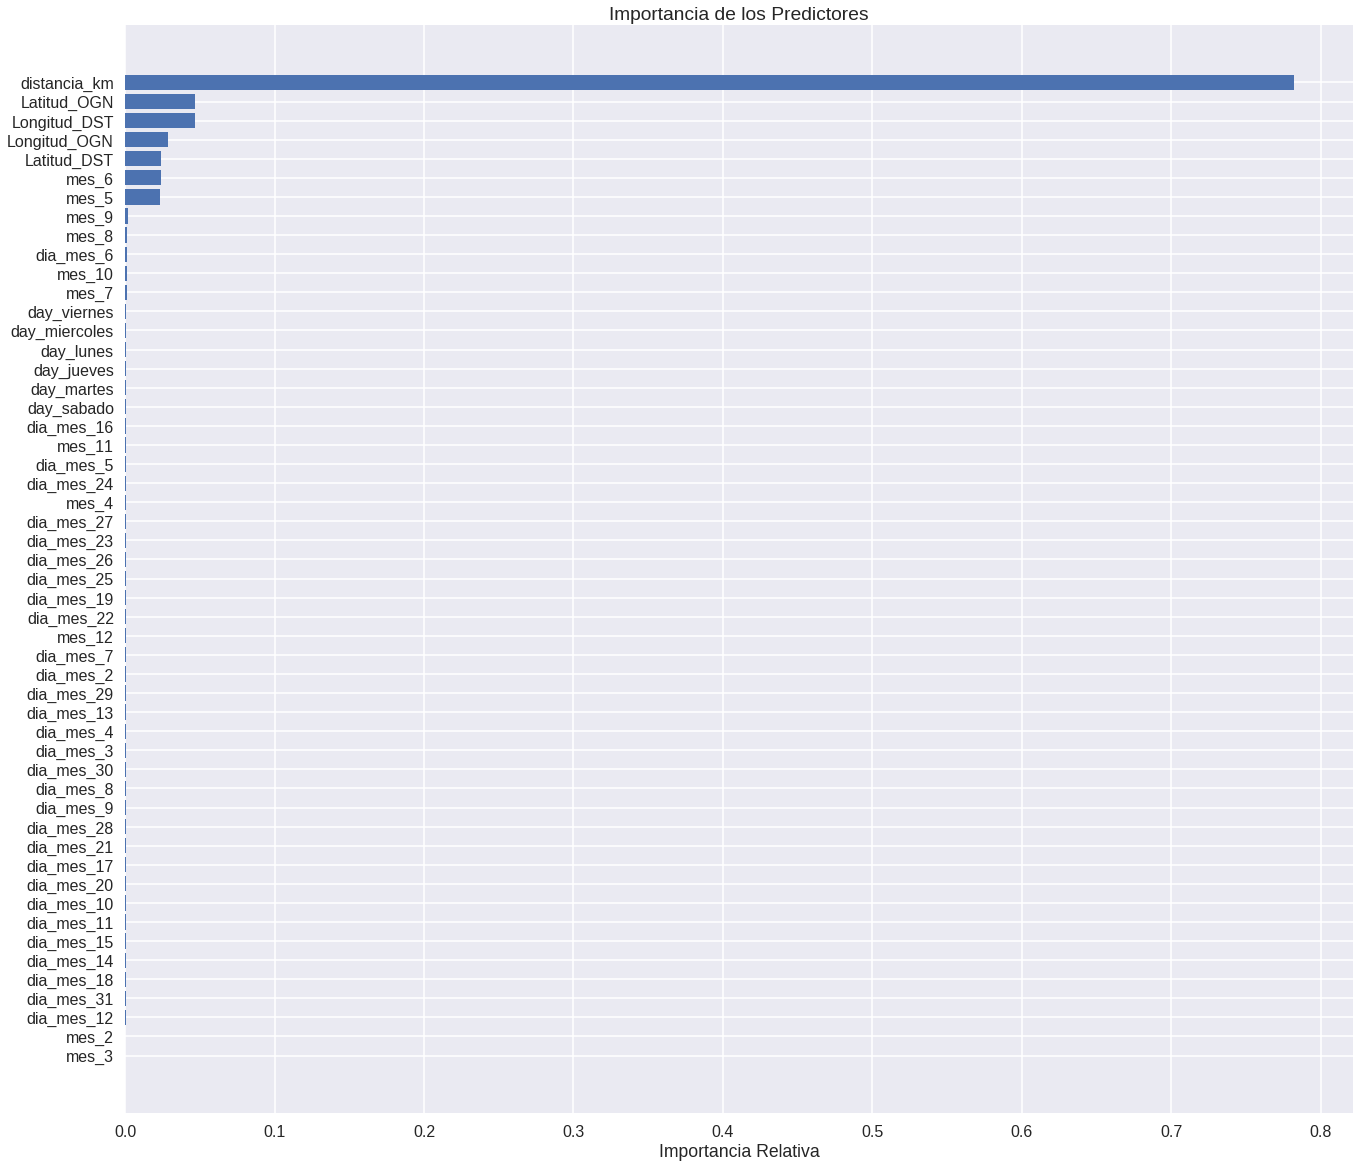

In [68]:
# Almacenamiento de la importancia de los predictores.
importances = rf.calibrate.feature_importances_
indices = np.argsort(importances)

# Gráfico de importancia de los predictores.
#plt.figure(1)

plt.figure(figsize=(22,20))
plt.title('Importancia de los Predictores')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
mean_squared_error(pred,y_test),r2_score(y_test,pred),(np.sqrt(mean_squared_error(y_test, pred)))

(568.2424792978558, 0.521798979267488, 23.83783713548391)

### **DICCIONARIO CON MODELOS**

In [0]:
import time
from tqdm import *
from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



#GradientBoosting parámetros
params = {'n_estimators': 20, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

#adaBoost parámetros
ada_tree_backing = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3)
 

models = {'lasso': lm.Lasso(alpha = 0.1),
          'ridge': lm.Ridge (alpha = .5),
          'linear':lm.LinearRegression(),
          'rf':RandomForestRegressor(max_depth=6, random_state=0,
                                     n_estimators=20,
                                     max_features='sqrt',n_jobs=-1),
          "svr" : LinearSVR(random_state=0, tol=1e-5),
          "lassoLars":lm.LassoLars(alpha=.1),
          "bayridge" : lm.BayesianRidge(),
          "gra.Boosting":GradientBoostingRegressor(**params),
          "BagRegr":BaggingRegressor(n_estimators=20,random_state=0),
          "AdaBoost":AdaBoostRegressor(ada_tree_backing, learning_rate=0.1, loss='square', n_estimators=20)
          #"svr_rbf" : SVR(kernel='rbf', C=1e3, gamma=0.1),
          #"svr_lin" : SVR(kernel='linear', C=1e3),
          #"svr_poly" : SVR(kernel='poly', C=1e3, degree=2)
    
         }

In [71]:
for model in tqdm(models.keys()):
   models[model].fit(x_train, y_train)

100%|██████████| 10/10 [07:04<00:00, 62.50s/it]


In [72]:
y_pred = pd.DataFrame(index=x_test.index, columns=models.keys())
for model in tqdm(models.keys()):
   y_pred[model] = models[model].predict(x_test)

100%|██████████| 10/10 [00:03<00:00,  2.44it/s]


In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

for model in models.keys():
    print(model,'MAE',mean_absolute_error(y_test,y_pred[model]))
    print(model,'MSE',mean_squared_error(y_test,y_pred[model]))
    print(model,'R2S',r2_score(y_test,y_pred[model]))


lasso MAE 12.15328064267053
lasso MSE 509.1387654050035
lasso R2S 0.5715373521317761
ridge MAE 12.131274467718784
ridge MSE 506.74336686050225
ridge R2S 0.5735531852853573
linear MAE 12.131272744797432
linear MSE 506.74363087178574
linear R2S 0.5735529631082588
rf MAE 12.862241813704593
rf MSE 713.4769846065028
rf R2S 0.39957775995633527
svr MAE 13.970889804590335
svr MSE 822.3993146240784
svr R2S 0.3079148320820785
lassoLars MAE 14.583784388341076
lassoLars MSE 1188.2935448535413
lassoLars R2S -1.243801701633629e-06
bayridge MAE 12.131474632102927
bayridge MSE 506.7141476495398
bayridge R2S 0.5735777745355739
gra.Boosting MAE 13.943294209173319
gra.Boosting MSE 983.810700957387
gra.Boosting R2S 0.17208005641058421
BagRegr MAE 11.022392137350407
BagRegr MSE 525.1624979293936
BagRegr R2S 0.5580526769653291
AdaBoost MAE 14.815108083228326
AdaBoost MSE 1186.171670610349
AdaBoost R2S 0.0017844066308643214


### **CALIBRACIÓN MODELO RIDGE  VÍA VALIDACIÓN CRUZADA**

In [0]:
alphas     = np.arange(0.001,10,0.01) 
regRidgeCV = lm.RidgeCV(alphas=alphas , cv=5)


In [75]:
regRidgeCV.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [76]:
 regRidgeCV.alpha_

AttributeError: ignored

In [77]:
model_Ridge= lm.Ridge (alpha =regRidgeCV.alpha_,fit_intercept=True,max_iter=3000,)

AttributeError: ignored

In [39]:
model_Ridge.fit(x_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
predRidge=model_Ridge.predict(X=x_test)
predRidge

array([17., 14., 27., ..., 16., 18., 48.])

In [41]:
 print(model_Ridge,'MAE',mean_absolute_error(y_test,predRidge))
 print(model_Ridge,'MSE',mean_squared_error(y_test,predRidge))
 print(model_Ridge,'R2S',r2_score(y_test,predRidge))

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001) MAE 8.581430272772022e-11
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001) MSE 1.885879903668744e-20
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=3000,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2S 1.0


In [42]:
import time
from tqdm import *

mridge = lm.Ridge()


errors = []

for a in tqdm(alphas):
    mridge.set_params(alpha=a)
    mridge.fit(x_train, y_train)
    coefs.append(mridge.coef_)
    predict= mridge.predict(x_test)
    errors.append(mean_squared_error(y_test,predict))

plt.figure(figsize=(20, 6))

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]


NameError: ignored

### **CALIBRACIÓN MODELO ADABOOST REGRESSOR VÍA VALIDACIÓN CRUZADA**

In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [30,50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }


In [0]:
pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),param_distributions = param_dist,cv=3,n_iter = 10)

In [0]:
pre_gs_inst.fit(x_train, y_train)

In [0]:
pre_gs_inst.best_params_

In [0]:
ada_calibrate = AdaBoostRegressor(base_estimator=None, learning_rate=0.01, loss='linear',
         n_estimators=30, random_state=1456)

In [0]:
ada_calibrate.fit(x_train, y_train)

In [0]:
pred_ada = ada_calibrate.predict(x_test)

In [0]:
# Almacenamiento de la importancia de los predictores.
importances = ada_calibrate.feature_importances_
indices = np.argsort(importances)

# Gráfico de importancia de los predictores.
#plt.figure(1)

plt.figure(figsize=(22,20))
plt.title('Importancia de los Predictores')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
mean_squared_error(pred_ada,y_test),r2_score(y_test,pred_ada),(np.sqrt(mean_squared_error(y_test, pred_ada)))

### **CALIBRACIÓN MODELO LINEAR SVR  REGRESSOR VÍA VALIDACIÓN CRUZADA**

In [0]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_SVR = {
"C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
"epsilon":[0.0001, 0.001, 0.01, 0.1, 1, 2, 5],
"loss":['squared_epsilon_insensitive','epsilon_insensitive']
#"max_iter":[100,500,1000,1500,2000],
#"fit_intercept":[True,False]
#"dual":[True,False]
}


In [0]:
estimator = LinearSVR(random_state=12)

In [0]:
gridsearch = GridSearchCV(estimator,param_SVR,scoring="r2",n_jobs=-1,cv=2,verbose=2)

In [0]:
gridsearch.fit(x_train,y_train)

In [0]:
gridsearch.best_params_

In [0]:
 SVR_calibrate = LinearSVR(C=0.01,epsilon=0.0001,random_state=0, tol=1e-5,loss='squared_epsilon_insensitive',fit_intercept=False,dual=True,max_iter :2000)

In [0]:
 SVR_calibrate.fit(x_train, y_train)

In [0]:
 predSVR=SVR_calibrate.predict(x_test)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
mean_squared_error( predSVR,y_test),r2_score(y_test, predSVR),(np.sqrt(mean_squared_error(y_test,  predSVR)))

### ** SALVADO DEL MODELO**

In [0]:
from sklearn.externals import joblib
filename = 'rf.calibrate.pkl'
joblib.dump(rf.calibrate, filename)


In [0]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)